In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import metrics

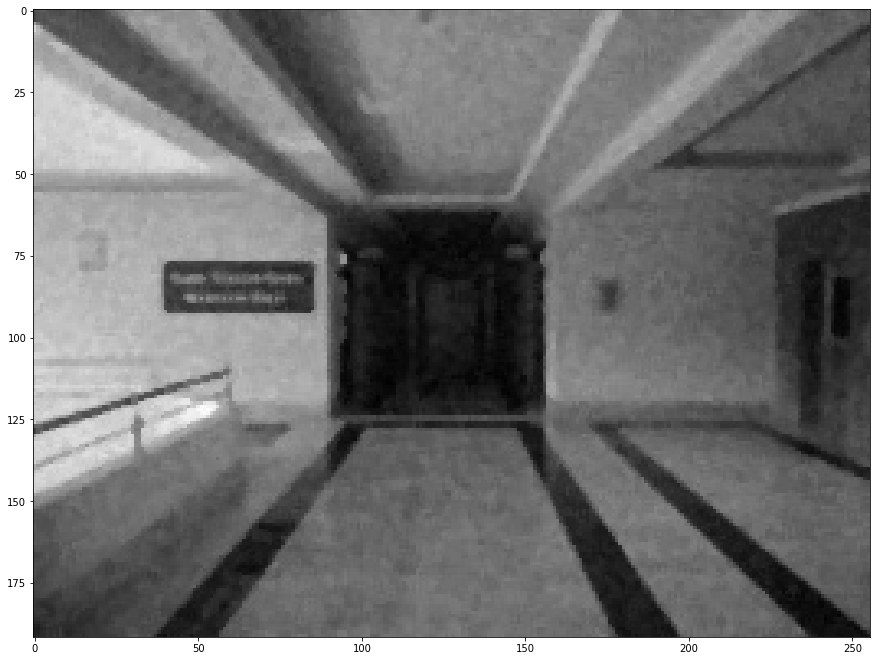

In [2]:
img= cv2.imread('New Noisy Image.jpg',0)
org = cv2.imread('original.jpg',0)
fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(100)
plt.imshow(img,'gray')

In [3]:
padded_arr =np.zeros((img.shape[0]+2,img.shape[1]+2))
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        padded_arr[i+1][j+1] = img[i][j]

for i in range (1,img.shape[1]):
    padded_arr[0][i]=padded_arr[1][i]
    padded_arr[img.shape[0]+1][i]=padded_arr[img.shape[0]][i]
for i in range (1,img.shape[0]):
    padded_arr[i][0]=padded_arr[i][1]
    padded_arr[i][img.shape[1]+1]=padded_arr[i][img.shape[1]]
padded_arr[0][0]=padded_arr[1][1]
padded_arr[img.shape[0]+1][0]=padded_arr[img.shape[0]][1]
padded_arr[img.shape[0]+1][img.shape[1]+1]=padded_arr[img.shape[0]][img.shape[1]]
padded_arr[0][img.shape[1]+1]=padded_arr[1][img.shape[1]]

In [4]:
kernel= np.array([[1,1,1],
                [1,-8,1],
                [1,1,1]])

In [5]:
new_img=np.zeros(img.shape,'uint8')

for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i,j]=np.sum(padded_arr[i:i+3,j:j+3]*kernel)

for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i,j]=img[i,j]-new_img[i,j]
#new_img1 = cv2.Laplacian(img,cv2.CV_32F)


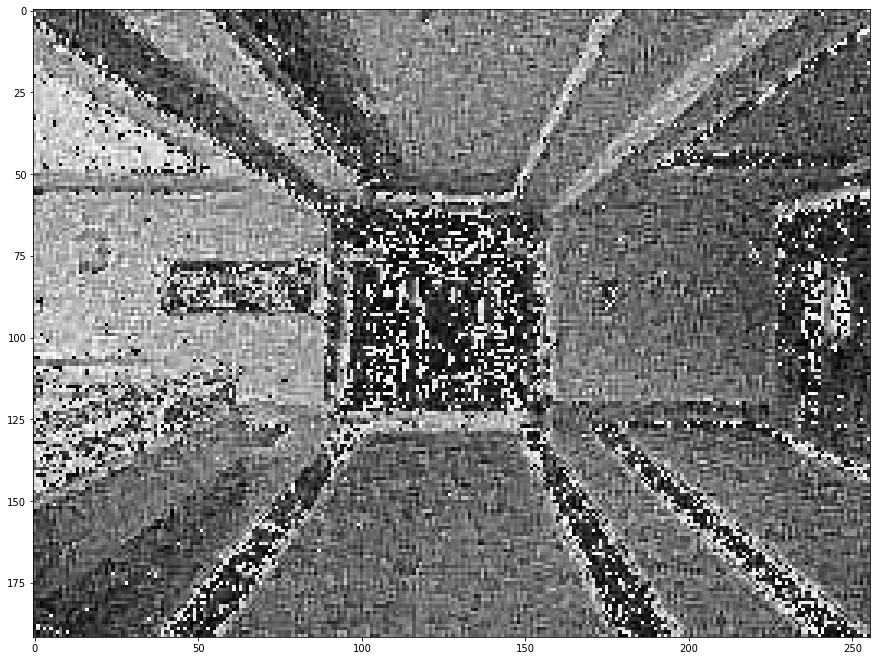

In [6]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111)
plt.imshow(new_img,'gray')

In [7]:
print("PSNR(My method): ",metrics.peak_signal_noise_ratio(org,new_img))
#print("PSNR(Using CV function): ",metrics.peak_signal_noise_ratio(org,new_img1))

PSNR(My method):  12.387105946187615
